In [141]:
import ssl
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import pandas as pd
from bs4 import BeautifulSoup

ssl._create_default_https_context = ssl._create_unverified_context
url = 'https://en.wikipedia.org/wiki/List_of_North_Carolina_locations_by_per_capita_income'
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")

In [142]:
right_table = soup.find_all('table', class_='wikitable sortable')

In [143]:
right_table = all_sortable_tables[0]

In [144]:
A=[] #Rank
B=[] #Country
C=[] #Per Capita Income
D=[] #Median Household Income
E=[] #Median Family Income
F=[] #Population
G=[] #Number of Households

for row in right_table.findAll('tr'):
    cells = row.findAll('td')
    if len(cells)==7:
        A.append(cells[0].find(text=True).strip())
        B.append(cells[1].find(text=True).strip())
        C.append(cells[2].find(text=True).strip())
        D.append(cells[3].find(text=True).strip())
        E.append(cells[4].find(text=True).strip())
        F.append(cells[5].find(text=True).strip())
        G.append(cells[6].find(text=True).strip())

In [145]:

df = pd.DataFrame(A, columns=['Rank'])
df['Country']=B
df['per capita income']=C
df['Median household income']=D
df['median family income']=E
df['Population']=F
df['Number of households']=G
df

,Rank,Country,per capita income,Median household income,median family income,Population,Number of households
0,1,Orange,"$32,912","$52,981","$79,811","133,801","51,457"
1,2,Wake,"$32,592","$63,770","$81,461","900,993","345,645"
2,3,Mecklenburg,"$31,848","$55,294","$67,375","919,628","362,213"
3,4,Dare,"$30,327","$53,889","$65,778","33,920","14,335"
4,5,Chatham,"$29,991","$56,038","$66,120","63,505","25,845"
...,...,...,...,...,...,...,...
97,96,Duplin,"$16,693","$32,816","$40,774","58,505","22,495"
98,97,Scotland,"$16,297","$29,368","$37,232","36,157","13,614"
99,98,Tyrrell,"$15,812","$32,215","$37,708","4,407","1,595"
100,99,Robeson,"$15,321","$29,667","$34,788","134,168","47,997"


In [146]:
df.to_csv('CSC221-webscrape-data.csv')

In [147]:
#PART 2

In [148]:
with open('CSC221-webscrape-data.csv') as csv_file:
    # read the csv file into a dataframe
    df = pd.read_csv(csv_file)

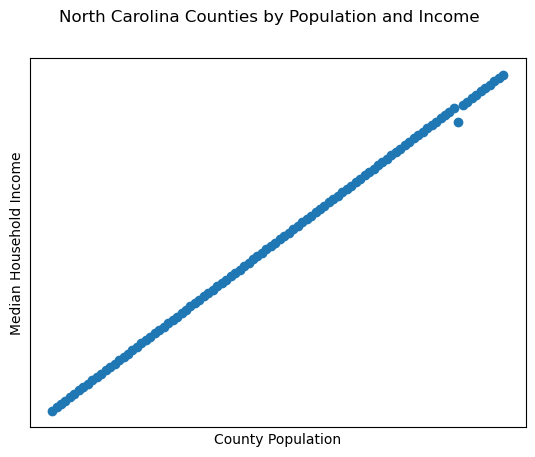

In [149]:
    # add titles
    plt.xlabel('County Population')
    plt.ylabel('Median Household Income')
    plt.suptitle('North Carolina Counties by Population and Income')
    
    #plot the population and median household stats 
    plt.scatter(df['Population'], df['Median household income'])
    
    # clean up graph
    plt.tick_params(
                    axis='both',
                    which='both',
                    bottom=False,
                    top=False,
                    left=False,
                    labelbottom=False,
                    labelleft=False)
 
    
    
    
   
    plt.show()